In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#set plot style plt.style.use('fivethirtyeight')
train = pd.read_csv('train.csv')
type(train)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column has the most null cells (687)

In [5]:
to_drop = train[train.Embarked.isnull()]
to_drop


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
train.loc[train['Embarked'].isnull(), 'Embarked']
train = train.drop(61)
train = train.drop(829) 

#QUESTION why do i not need to specify axis in this situation or make inplace = true?

In [7]:
train[train.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
train.Cabin.fillna('**¯\\_(ツ)_/¯**', inplace = True)

In [9]:
train[train.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
#There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
train['FamilyCount'] = train['SibSp']+train['Parch']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [11]:
#Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
train['IsReverend'] = train['Name'].apply(lambda x: 1 if 'Rev.' in x else 0)

In [12]:
#3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  #- Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  #- Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  #- Do the same thing for `Sex`
  #- BONUS: Extract the title from everyone's name and create dummy columns

column_names = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
column_names1 = ['Male', 'Female']
train_embarked = pd.get_dummies(train['Embarked'], dtype=int ,columns = column_names)
train = pd.concat([train, train_embarked], axis = 1)
train_sex = pd.get_dummies(train['Sex'], dtype=int, columns = column_names1 )
train = pd.concat([train, train_sex], axis = 1)
train = train.rename(columns = {'C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S', 'female':'Female','male':'Male'})
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1


In [13]:
#1. What was the survival rate overall?
train['Survived'].value_counts()
overall_survival_rate = 340/890
print ('Q1: Overall survival rate = ', overall_survival_rate)
#2. Which gender fared the worst? What was their survival rate?
train.groupby('Sex')['Survived'].value_counts()
print('Q2: Male survival rate =',109/(468+109))
print('Female survival rate =',231/(231+81))
print('Males have the lower survival rate of 0.189')









Q1: Overall survival rate =  0.38202247191011235
Q2: Male survival rate = 0.18890814558058924
Female survival rate = 0.7403846153846154
Males have the lower survival rate of 0.189


In [14]:
#3. What was the survival rate for each `Pclass`?
train.groupby('Pclass')['Survived'].value_counts()
pc1 = 134/(80+134)
pc2 = 87/(97+87)
pc3 = 119/(119+372)
print (f"Pclass 1: {pc1}. Pclass 2: {pc2}. Pclass 3: {pc3}")

Pclass 1: 0.6261682242990654. Pclass 2: 0.47282608695652173. Pclass 3: 0.24236252545824846


In [15]:
#4. Did any reverends survive? How many?
train.groupby('IsReverend')['Survived'].value_counts()
print('no reverends survived')

no reverends survived


In [16]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
train.groupby('Cabin')['Survived'].value_counts()
sr = 206/(481+206)
print('The survival rate of those in cabin **¯\_(ツ)_/¯** is', sr)

The survival rate of those in cabin **¯\_(ツ)_/¯** is 0.29985443959243085


In [17]:
#6. What is the survival rate for people whose `Age` is empty?
train['Age'].unique()
train['Age'] = train['Age'].fillna(0)
train.groupby('Age')['Survived'].value_counts()
sr = 52/(52+125)
print(f"survival rate for those whose age is empty is {sr}")

survival rate for those whose age is empty is 0.2937853107344633


In [18]:
#7. What is the survival rate for each port of embarkation?
train.groupby('Embarked')['Survived'].value_counts()
src = 93/(93+75)
srq = 30/77
srs = 217/(217+427)
print(f'survival rate for those embarking from C = {src}')
print(f'survival rate for those embarking from Q = {srq}')
print(f'survival rate for those embarking from S = {srs}')

survival rate for those embarking from C = 0.5535714285714286
survival rate for those embarking from Q = 0.38961038961038963
survival rate for those embarking from S = 0.33695652173913043


In [19]:
#8. What is the survival rate for children (under 12) in each `Pclass`?
children = train[train['Age'] < 12]
children.groupby('Pclass')['Survived'].value_counts()
sr1 = 3/4
sr2 = 1
sr3 = 19/47
print(f'survival for pclass 1 = {sr1}. Survival for pclass 2 = {sr2}. Survival for pclass 3 = {sr3}')


survival for pclass 1 = 0.75. Survival for pclass 2 = 1. Survival for pclass 3 = 0.40425531914893614


In [20]:
#9. Did the captain of the ship survive? Is he on the list?
cap = train['Name'].str.contains('Cap')
cap.value_counts()
print('The captain is on the ship')
capt = train[train['Name'].str.contains('Capt')]
capt
print('captain did not survive')

The captain is on the ship
captain did not survive


In [21]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?
train.groupby('Survived').apply(lambda x:x.sort_values(by='Fare', ascending = False))
print('Masselmani, Mrs Fatima had the most expensive ticket out of those who survived at 7.2250')



Masselmani, Mrs Fatima had the most expensive ticket out of those who survived at 7.2250


In [22]:
#11. Does having family on the boat help or hurt your chances of survival?
train['family'] = ((train['SibSp'] != 0)| (train['Parch']!= 0)).astype(int)
train.groupby('family')['Survived'].value_counts()
srf = 179/(179+175)
srnf = 161/(161+374)
print (srf, srnf)
print('Having family increases the chances of survival')

0.5056497175141242 0.30093457943925234
Having family increases the chances of survival


In [23]:
print (srf, srnf)

0.5056497175141242 0.30093457943925234


In [24]:
train.groupby('family')['Survived'].value_counts()


family  Survived
0       0           374
        1           161
1       1           179
        0           175
Name: count, dtype: int64

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S,0,1,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S,3,0,0,0,1,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Survival Count by Family')

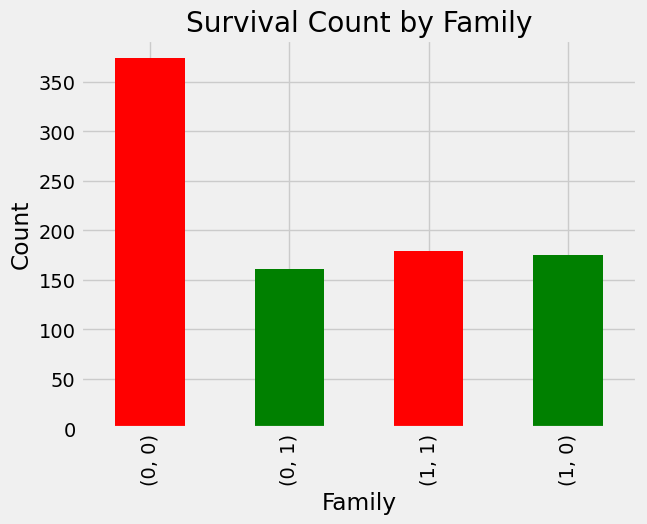

In [48]:
#Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 
#It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.
grouped_data = train.groupby('family')['Survived'].value_counts()
grouped_data.plot(kind='bar', stacked=True, color=['red','green'])
plt.xlabel('Family')
plt.ylabel('Count')
plt.title('Survival Count by Family')

Text(0.5, 1.0, 'Survival Count by Sex')

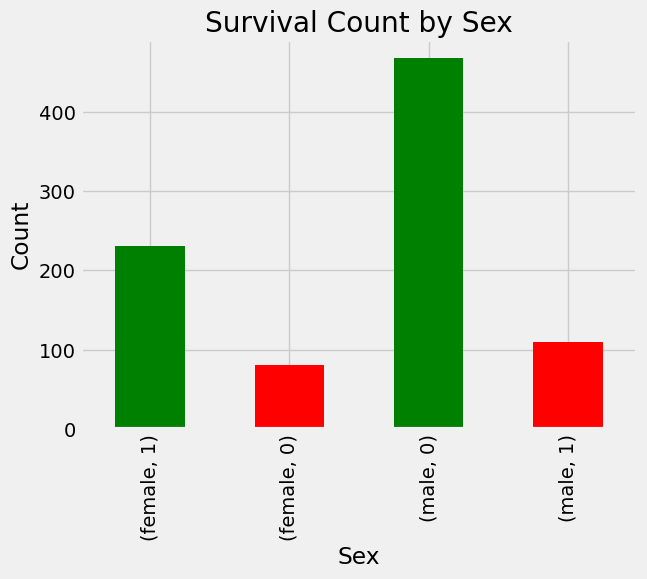

In [51]:
grouped_data = train.groupby('Sex')['Survived'].value_counts()
grouped_data.plot(kind='bar', stacked=True, color=['green','red'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')


Text(0.5, 1.0, 'Survival Count by Port')

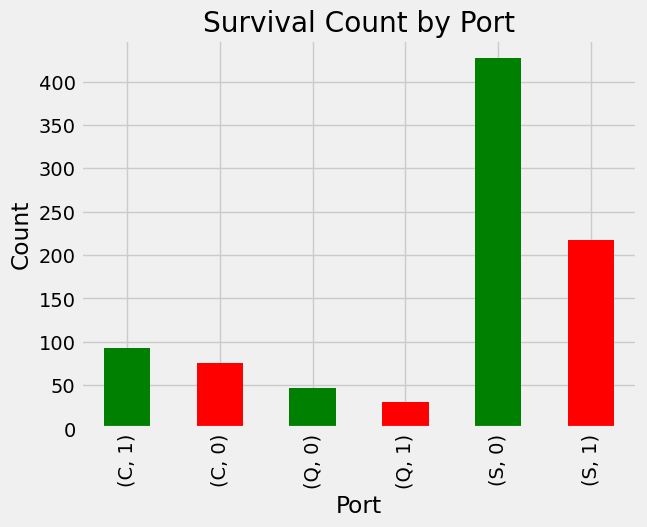

In [53]:
grouped_data = train.groupby('Embarked')['Survived'].value_counts()
grouped_data.plot(kind='bar', stacked=True, color=['green','red'])
plt.xlabel('Port')
plt.ylabel('Count')
plt.title('Survival Count by Port')

Text(0.5, 1.0, 'Survival Count by Age Range')

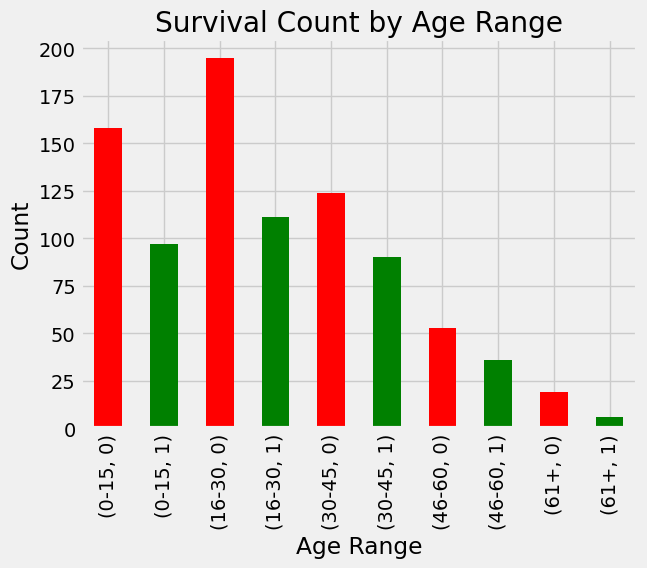

In [45]:
bins = [0, 15, 30, 45, 60, float('inf')]
labels = ['0-15', '16-30', '30-45', '46-60', '61+']
train['PriceRange'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
grouped_data = train.groupby('PriceRange')['Survived'].value_counts()
grouped_data.plot(kind='bar', stacked=True, color=['red','green'])
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Survival Rate by Age Range')